<a href="https://colab.research.google.com/github/ttogle918/ds-section1-sprint3/blob/master/n133-dimensionality-reduction-techniques/n133a-high-dimensional-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 3*

# 📝 Assignment



## 1. 주어진 matrix에 대해서, numpy를 사용하여, `eigenvalue`와 `eigenvector`를 구하고, 각각 `value`, `vector`에 저장하세요.

\begin{bmatrix} 4 & 2 \\ 2 & 4 \end{bmatrix}

In [1]:
from numpy import linalg as LA
import numpy as np
value, vector = LA.eig(np.array([[4, 2], [2, 4]]))
print(value, vector)

[6. 2.] [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


## 2. Penguins dataset을 사용하여 numerical feature 4개에 대해서 2차원으로 PCA를 시행 후 PC1 & PC2를 사용하여 scatter plot을 그리세요.

- 데이터셋 사용을 위해, 다음 링크를 참조하세요.

<http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset>

- 4개의 feature는 `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g` 입니다.

- 이후 2개의 PC를 이용하여 설명되는 variance의 ratio를 `ratio`에 저장하세요.

- 다음과 같은 결과가 나와야 합니다.

<img src='https://i.imgur.com/5BCEHeL.png'>

In [12]:
# 이곳에 답안을 작성하시기 바랍니다
import pandas as pd
import seaborn as sns

df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [13]:
# 전처리
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [14]:
df = df.dropna()
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [15]:
name_list = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x = df.loc[:,name_list].values
y = df['species'].values # 종속변인 추출


In [18]:
x = StandardScaler().fit_transform(x)

In [19]:
pd.DataFrame(x, columns=name_list).head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852


In [20]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [21]:
finalDataFrame = pd.concat([principalDf, df[['species']]], axis=1)

In [25]:
labels = []
yList = y.tolist()
for label in yList:
  if label not in labels:
    labels.append(label)
    
labels

['Adelie', 'Chinstrap', 'Gentoo']

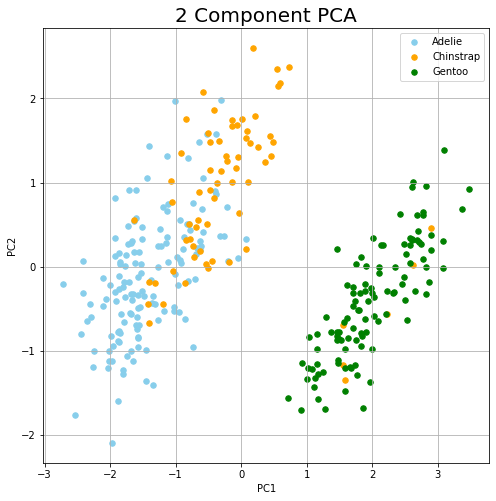

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('2 Component PCA', fontsize = 20)

colors = ["skyblue","orange","green"]
for label, color in zip(labels, colors):
  indicesToKeep = finalDataFrame['species'] == label
  ax.scatter(finalDataFrame.loc[indicesToKeep, 'PC1']
               , finalDataFrame.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 30)

ax.legend(labels)
ax.grid()

## 🔥 도전 과제

### "Scree Plot" 에 대해서 알아보고, 위에서 PCA로 만든 데이터셋을 사용하여 만들어보세요. 90%의 내용을 설명하기 위해서, 몇개의 PC를 사용해야 하나요?


In [ ]:
# 이곳에 답안을 작성하시기 바랍니다